In [22]:
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, learning_rate=0.0001, optimizer='momentum'):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)
        
        for _ in range(1, epochs):
            avg_minibatch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            self.theta_array -= learning_rate * avg_minibatch_partial_grads
        
    def validate(self, x, y):
        self._check_theta_exists('validating')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists('predicting')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss
    
    def _check_theta_exists(self, phrase):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before {}}.".format(phrase))


In [24]:
linear_regression = LinearRegression()

In [25]:
x = np.array(np.arange(100))
delta = np.random.uniform(0,10, size=(100,))
y = (.4 * x +1 + delta)

In [26]:
linear_regression.train(x, y, epochs=20, learning_rate=0.0001)

In [27]:
y_predicted = linear_regression.predict(x)

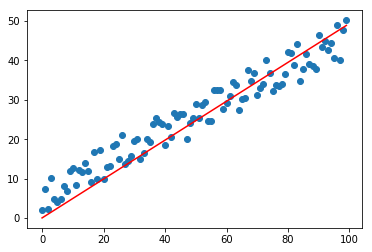

In [28]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()